In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('Predict_student_ knowledge_level.xls')
df.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


EDA
Variable Description
STG The degree of study time for goal object materials
SCG The degree of repetition number of user for goal object materials
STR The degree of study time of user for related objects with goal object
LPR The exam performance of user for related objects with goal object
PEG The exam performance of user for goal objects
UNS The knowledge level of user (Very Low, Low, Middle, High)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5    UNS    403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [4]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [5]:
df.isnull().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [6]:
#fix columns as there appears a space in column name UNS
df.columns = [each.strip() for each in df.columns]
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')

In [7]:
df.UNS.value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

In [8]:
df.UNS=[each.lower().replace("very low","very_low") for each in df.UNS]
df.UNS.value_counts()

low         129
middle      122
high        102
very_low     50
Name: UNS, dtype: int64

In [9]:
import matplotlib.pyplot as plt

def Bar_Plot(variable):
    variableCount = df[variable].value_counts()
    variableIndex = variableCount.index
    
    plt.figure(figsize = (9,5))
    plt.bar(variableIndex,variableCount)
    plt.xticks(variableIndex)
    plt.title(variable)
    plt.show()

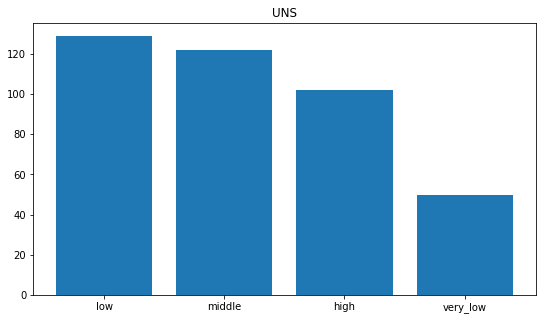

In [10]:
Bar_Plot("UNS")

In [11]:
def Hist_Plot(variable):
    
    plt.figure(figsize = (9,4))
    plt.hist(df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

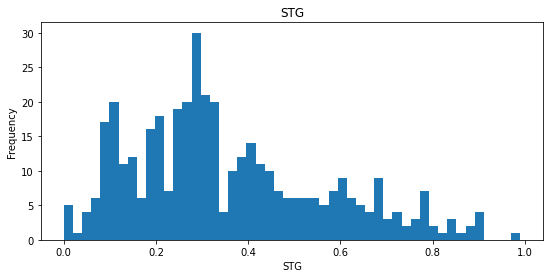

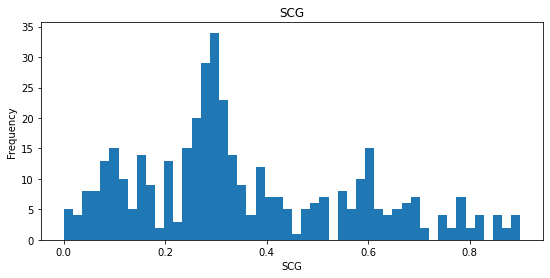

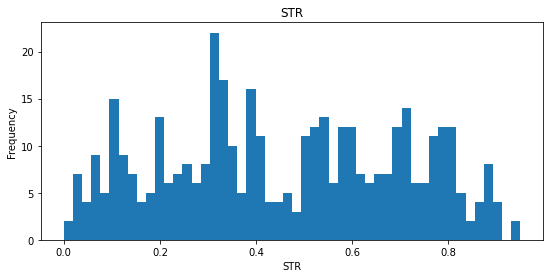

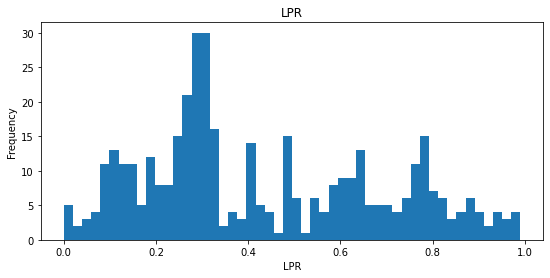

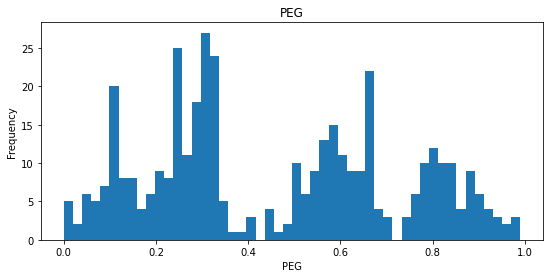

In [12]:
NumericalColumns = ["STG","SCG","STR","LPR","PEG"]
for each in NumericalColumns:
    Hist_Plot(each)

In [14]:
#Data analysis
df[["UNS","STG"]].groupby(["UNS"],as_index=False).mean().sort_values(by="STG",ascending=False)

,UNS,STG
0,high,0.406902
2,middle,0.374574
1,low,0.326783
3,very_low,0.259180


In [15]:
df[["UNS","SCG"]].groupby(["UNS"],as_index=False).mean().sort_values(by="SCG",ascending=False)

,UNS,SCG
0,high,0.430500
2,middle,0.367189
1,low,0.322798
3,very_low,0.261900


In [16]:
df[["UNS","STR"]].groupby(["UNS"], as_index = False).mean().sort_values(by="STR",ascending = False)

,UNS,STR
0,high,0.509755
2,middle,0.491148
1,low,0.424961
3,very_low,0.354000


In [17]:
df[["UNS","LPR"]].groupby(["UNS"], as_index = False).mean().sort_values(by="LPR",ascending = False)

,UNS,LPR
0,high,0.542941
1,low,0.449302
2,middle,0.385656
3,very_low,0.268820


In [18]:
df[["UNS","PEG"]].groupby(["UNS"], as_index = False).mean().sort_values(by="PEG",ascending = False)

,UNS,PEG
0,high,0.799804
2,middle,0.531393
1,low,0.253589
3,very_low,0.095800


In [ ]:
#Outlier Detection

In [34]:
from collections import Counter
import numpy as np

def detect_outliers(df,features) :
    outlier_indices= []
   
    
    for c in features:
        #1st quartile
        Q1=np.percentile(df[c],25)
        #3rd quartile
        Q3=np.percentile(df[c],75)
        #IQR
        IQR=Q3-Q1
        #Outlier step
        outlier_step=IQR*1.5
        #Detect outlier and their indices
        oultier_list_col=df[(df[c]<Q1-outlier_step) | (df[c]>Q3+outlier_step)].index
        #Store indices
        outlier_indices.extend(oultier_list_col)
        
    outlier_indices = Counter(outlier_indices)    
    multiple_outliers=list(i for i ,v in outlier_indices.items() if v>2)
    
    
    return multiple_outliers
        
             
        
        
        


In [35]:
detect_outliers(df,["PEG","LPR","STR","SCG","STG"])

[]

In [ ]:
#there seems to be no outliers in the numerical features

In [36]:
import seaborn as sns

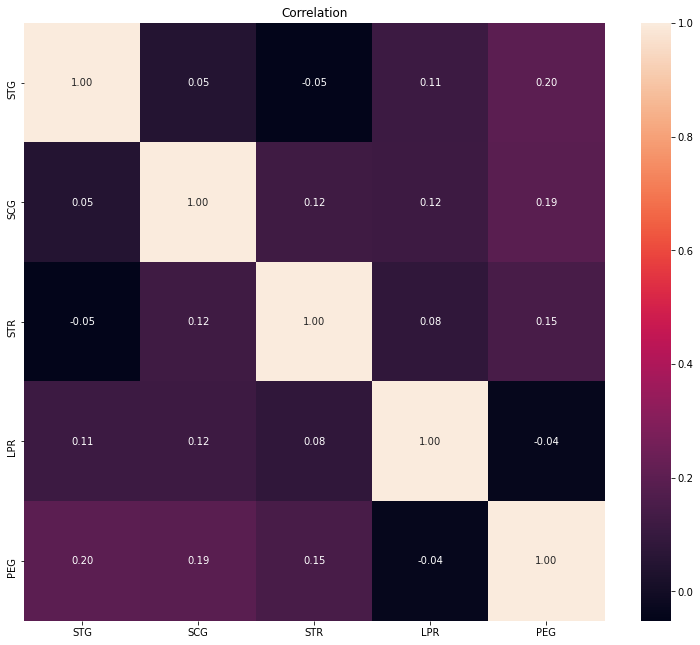

In [37]:
fig=plt.figure(figsize=(13,11))
r=sns.heatmap(df.corr(),annot=True,fmt= ".2f")
r.set_title("Correlation")
plt.show()

In [38]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

In [39]:
fig = px.scatter_matrix(df,color = "UNS",height = 1000,width = 1000)
fig.show()

In [41]:
#Data preprocessing for Machine Learning
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y = df.UNS
x = df.drop(["UNS"],axis= 1)

In [42]:
# Train - Test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [43]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

Train Score:  0.9777777777777777
Test Score:  0.9172932330827067


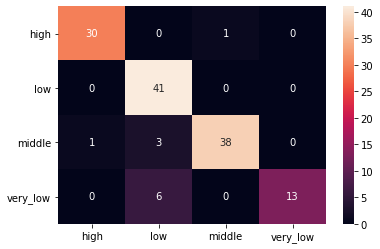

In [44]:
modelSVC=SVC(random_state=42).fit(X_train,Y_train)
preds_SVC=modelSVC.predict(X_test)
print("Train Score: ",modelSVC.score(X_train,Y_train))
print("Test Score: ",modelSVC.score(X_test,Y_test))
cmSVC = confusion_matrix(Y_test,preds_SVC)
sns.heatmap(cmSVC,annot = True,xticklabels= ['high', 'low', 'middle', 'very_low'],yticklabels = ['high', 'low', 'middle', 'very_low'])
plt.yticks(rotation = 0)
plt.show()

In [48]:
## Average is assigned micro#
from sklearn.metrics import precision_score
#precisionScore_sklearn_microavg = precision_score(Y_test, preds_SVC, average='micro')
print("Microaverage precision",precision_score(Y_test, preds_SVC, average='micro'))
print("Macroaverage precision",precision_score(Y_test, preds_SVC, average='macro'))
## Average is assigned macro#
#precisionScore_sklearn_macroavg = precision_score(Y_test, preds_SVC, average='macro')

Microaverage precision 0.9172932330827067
Macroaverage precision 0.9405252274607113
